In [1]:
import cv2                    
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

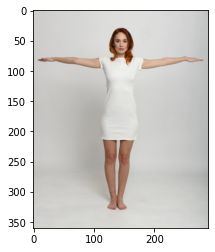

In [3]:
img = cv2.cvtColor(cv2.imread('test.jpg'),cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [31]:

results = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5).process(img)

results.pose_landmarks.landmark
# mp_pose.POSE_CONNECTIONS
# df = pd.DataFrame(results.pose_landmarks.landmark)
# df.head()
# lanmarkpoint
# print(lanmarkpoint.x, lanmarkpoint.y, lanmarkpoint.z, lanmarkpoint.visibility)
# results.pose_landmarks.landmark
# f = open("standing.csv", "a")
# pp = results.pose_landmarks.landmark
# f.write(",".join([str(i) for i in range(200)]))
# f.write("\n")
# f.write(",".join([(str(pp[i].x) + "," + str(pp[i].y) + "," + str(pp[i].z) + "," + str(pp[i].visibility)) for i in range(33)]))

[x: 0.5000619292259216
y: 0.16022223234176636
z: -0.4858666658401489
visibility: 0.9999208450317383
, x: 0.5145702958106995
y: 0.14467856287956238
z: -0.4434337615966797
visibility: 0.9995744824409485
, x: 0.5213801860809326
y: 0.14461445808410645
z: -0.4435517489910126
visibility: 0.9996390342712402
, x: 0.5282210111618042
y: 0.14487946033477783
z: -0.44364723563194275
visibility: 0.9995843768119812
, x: 0.49242568016052246
y: 0.14486181735992432
z: -0.4440530240535736
visibility: 0.9994624257087708
, x: 0.4839339554309845
y: 0.14474761486053467
z: -0.4440722167491913
visibility: 0.9994716048240662
, x: 0.4762330651283264
y: 0.1445755958557129
z: -0.44402429461479187
visibility: 0.9994027614593506
, x: 0.5392307043075562
y: 0.15386933088302612
z: -0.20086811482906342
visibility: 0.9994533658027649
, x: 0.4644940495491028
y: 0.15170922875404358
z: -0.20917285978794098
visibility: 0.9990839958190918
, x: 0.5141791105270386
y: 0.17846795916557312
z: -0.39719802141189575
visibility: 0.999

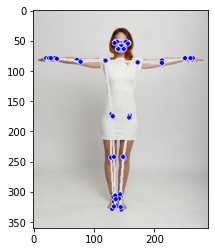

In [32]:
# cv2.imshow('Test Mediapipe', img)
mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
plt.imshow(img)
plt.show()

In [ ]:
# pp = results.pose_landmarks.landmark
# # print([(str(pp[i].x) + "," + str(pp[i].y) + "," + str(pp[i].z) + "," + str(pp[i].visibility)) for i in range(33)])
# a = ",".join([(str(pp[i].x) + "," + str(pp[i].y) + "," + str(pp[i].z) + "," + str(pp[i].visibility)) for i in range(33)])
# a

In [4]:
f = open("data_set.csv", "w")

In [5]:
f.write(",".join([str(i) for i in range(132)]))
f.write(",class_no,class_name\n")

21

In [6]:
font                   = cv2.FONT_HERSHEY_SIMPLEX
bottomLeftCornerOfText = (10,50)
fontScale              = 0.5
fontColor              = (255,0,0)
thickness              = 1
lineType               = 2

In [7]:
# version desktop
def collectingData2CSV(video_name, class_no, class_name, max_frames=1000):
    cap = cv2.VideoCapture(video_name)
    c = 0
    with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            # image.flags.writeable = False

            results = pose.process(image)

            # image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

            resized_img = cv2.resize(image, (394, 700))

            # display(resized_img)
            cv2.putText(resized_img, video_name + " @frames "+str(c) + "\n" + class_name, 
                bottomLeftCornerOfText, 
                font, 
                fontScale,
                fontColor,
                thickness,
                lineType)
            cv2.imshow("show pose detection",resized_img)

            landmarklist = results.pose_landmarks.landmark

            f.write(",".join([(str(landmarklist[i].x) + "," + str(landmarklist[i].y) + "," + str(landmarklist[i].z) + "," + str(landmarklist[i].visibility)) for i in range(33)]))
            f.write("," + str(class_no) + "," + class_name + "\n")

            c += 1
            
            if (c >= max_frames):
                break
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
            
    cap.release()
    # out.release()
    cv2.destroyAllWindows()
    print("Complete collecting data from", video_name, "from a total of ", c, "frames")

In [8]:
collectingData2CSV('standstill-sample.mp4', 0, 'standing')

Complete collecting data from standstill-sample.mp4 from a total of  234 frames


In [9]:
collectingData2CSV('t-pose-sample.mp4', 1, 't-pose')

Complete collecting data from t-pose-sample.mp4 from a total of  515 frames


In [10]:
collectingData2CSV('heart-pose-sample.mp4', 2, 'h-pose')

Complete collecting data from heart-pose-sample.mp4 from a total of  338 frames


In [11]:
f.close()

In [17]:
cap = cv2.VideoCapture(0)
c = 0
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        # image.flags.writeable = False

        results = pose.process(image)

        # image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        resized_img = cv2.resize(image, (700, 500))

        # display(resized_img)
        cv2.putText(resized_img, "WebCam" + " @frames "+str(c), 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            thickness,
            lineType)
        cv2.imshow("show pose detection",resized_img)

        landmarklist = results.pose_landmarks.landmark

        c += 1

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
# out.release()
cv2.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'landmark'

: 